In [5]:
import numpy as np
print(np.__version__)

2.2.2


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
df=pd.read_csv('banking_df.csv')
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
1,24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
2,24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
3,24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
4,24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
7838,45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
7839,45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
7840,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7842 non-null   int64 
 1   age         7842 non-null   int64 
 2   job         7842 non-null   object
 3   marital     7842 non-null   object
 4   education   7842 non-null   object
 5   default     7842 non-null   object
 6   balance     7842 non-null   int64 
 7   housing     7842 non-null   object
 8   loan        7842 non-null   object
 9   contact     7842 non-null   object
 10  day         7842 non-null   int64 
 11  month       7842 non-null   object
 12  duration    7842 non-null   int64 
 13  campaign    7842 non-null   int64 
 14  pdays       7842 non-null   int64 
 15  previous    7842 non-null   int64 
 16  poutcome    7842 non-null   object
 17  y           7842 non-null   object
dtypes: int64(8), object(10)
memory usage: 1.1+ MB


In [11]:
df.shape

(7842, 18)

In [12]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
1,24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
2,24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
3,24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
4,24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [13]:
# prompt: drop unnameed:0 column

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
1,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
2,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
3,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
4,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [15]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
1,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
2,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
3,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
4,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
7838,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
7839,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
7840,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,40.783856,1552.343280,14.260010,261.290615,2.064269,223.252869,3.184264
std,11.282964,3084.580003,7.885328,236.203272,1.566109,111.830127,4.614190
min,18.000000,-1884.000000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,32.000000,162.000000,7.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,595.000000,14.000000,194.000000,2.000000,195.000000,2.000000
75%,47.000000,1733.750000,20.000000,324.000000,2.000000,326.000000,4.000000
max,89.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


In [17]:
df.shape

(7842, 17)

In [18]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
# prompt: clean the data that is remove null values,only perform that step

df = df.dropna()
df.shape
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
1,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
2,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
3,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
4,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
7838,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
7839,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
7840,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [20]:
# prompt: remove all outliers

# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate Q1 and Q3 for numerical columns only
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from numerical columns
df_no_outliers = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

# Print the shape of the dataframe with outliers removed
df_no_outliers.shape

(5413, 17)

In [21]:
(df_no_outliers[numerical_cols] < lower_bound) | (df_no_outliers[numerical_cols] > upper_bound).any().any()

,age,balance,day,duration,campaign,pdays,previous
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7832,False,False,False,False,False,False,False
7834,False,False,False,False,False,False,False
7835,False,False,False,False,False,False,False
7836,False,False,False,False,False,False,False


In [22]:
# prompt: remove negative values from balance column

# ... (Your existing code)

# Remove negative values from the 'balance' column
df_no_outliers = df_no_outliers[df_no_outliers['balance'] >= 0]

# Print the shape of the dataframe after removing negative balances
df_no_outliers.shape

(5065, 17)

In [23]:
(df_no_outliers['balance'] < 0).sum()

0

In [24]:
# prompt: select all int columns and display its max and min values

# Select integer columns
int_cols = df_no_outliers.select_dtypes(include=['int64', 'int32']).columns

# Display max and min values for each integer column
for col in int_cols:
    print(f"Column: {col}")
    print(f"Max: {df_no_outliers[col].max()}")
    print(f"Min: {df_no_outliers[col].min()}")
    print("-" * 20)

Column: age
Max: 69
Min: 18
--------------------
Column: balance
Max: 4089
Min: 0
--------------------
Column: day
Max: 31
Min: 1
--------------------
Column: duration
Max: 640
Min: 6
--------------------
Column: campaign
Max: 3
Min: 1
--------------------
Column: pdays
Max: 603
Min: 1
--------------------
Column: previous
Max: 8
Min: 1
--------------------


In [25]:
df_no_outliers.shape

(5065, 17)

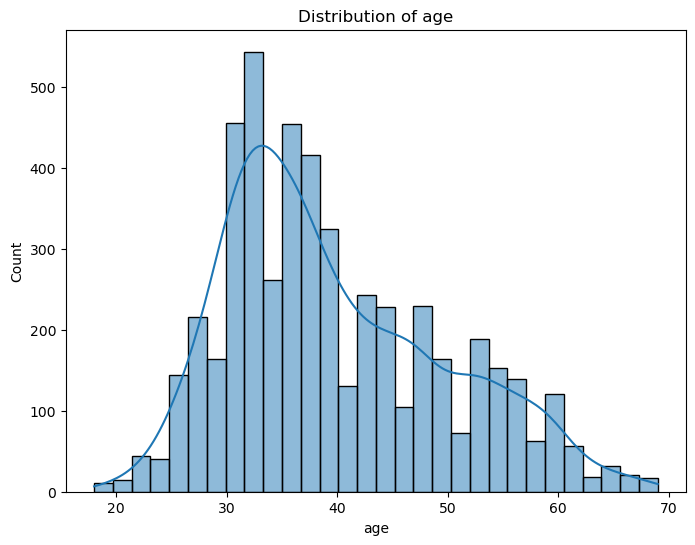

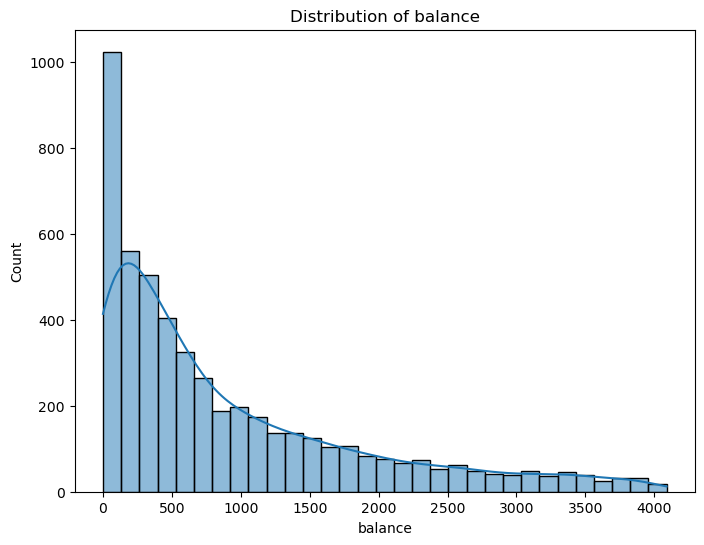

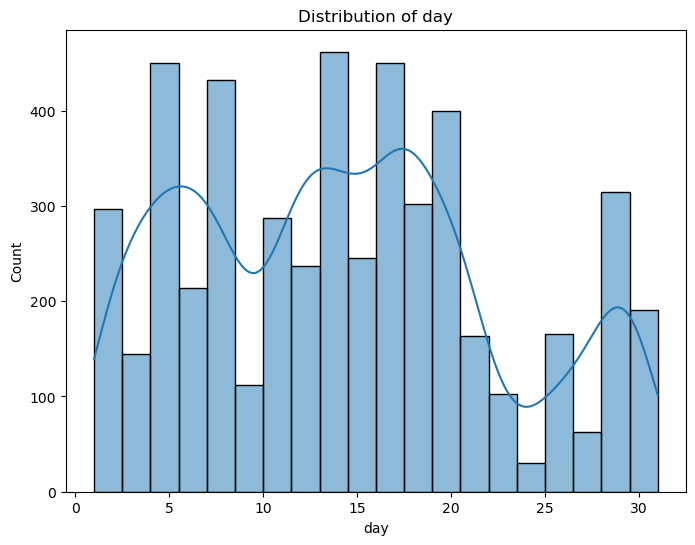

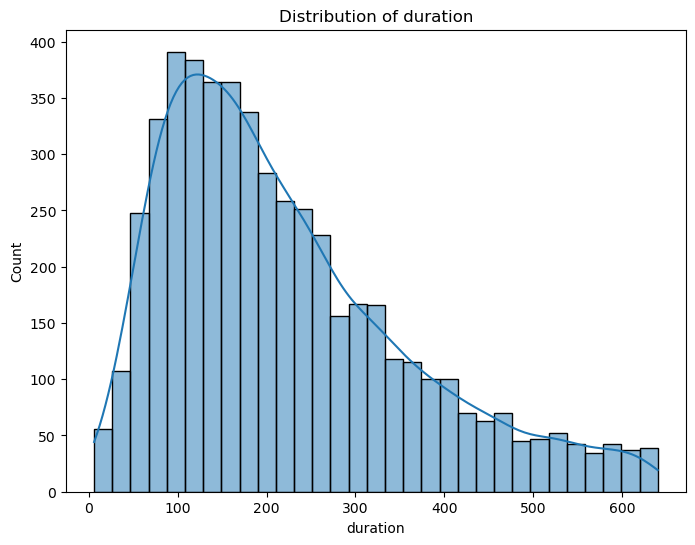

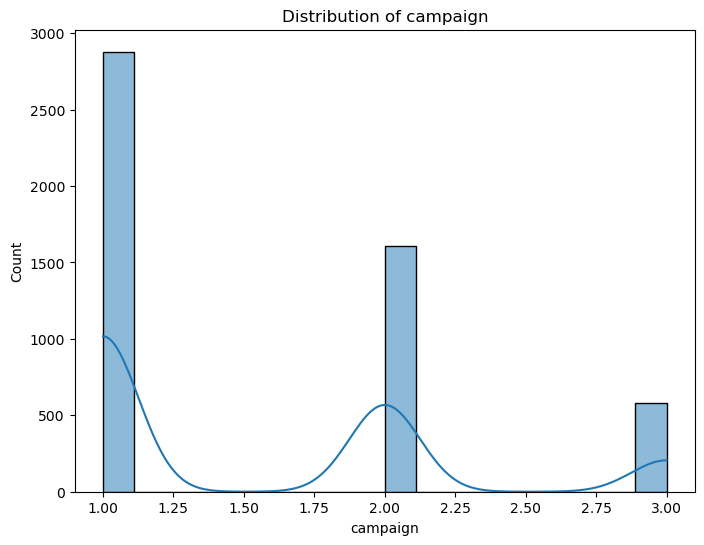

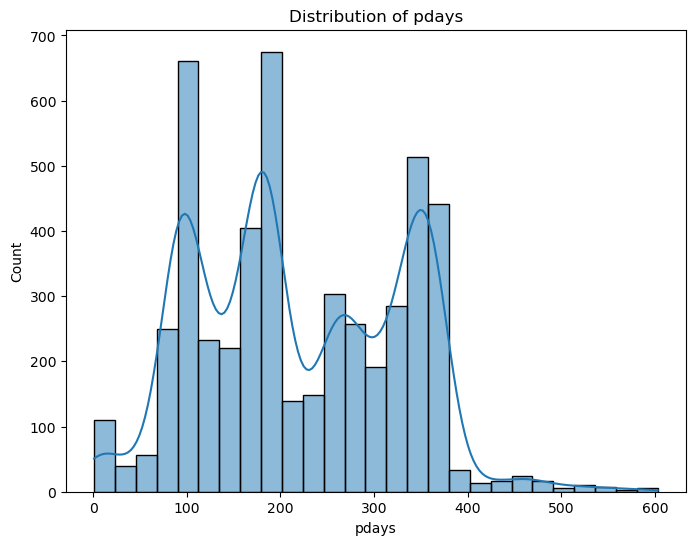

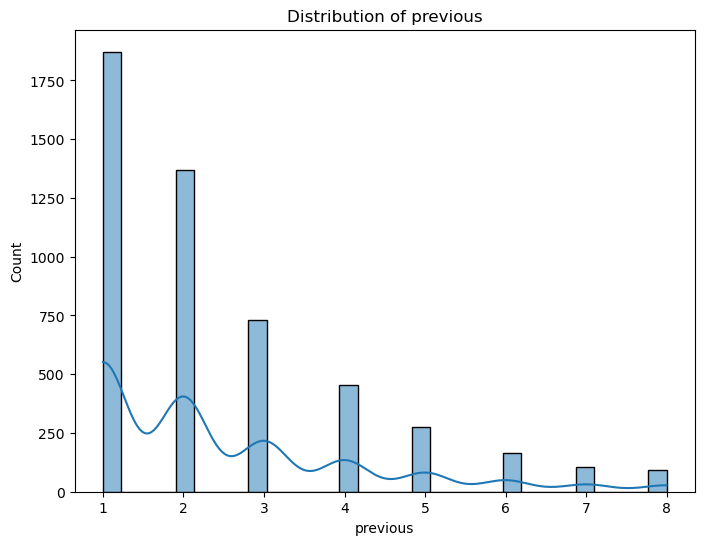

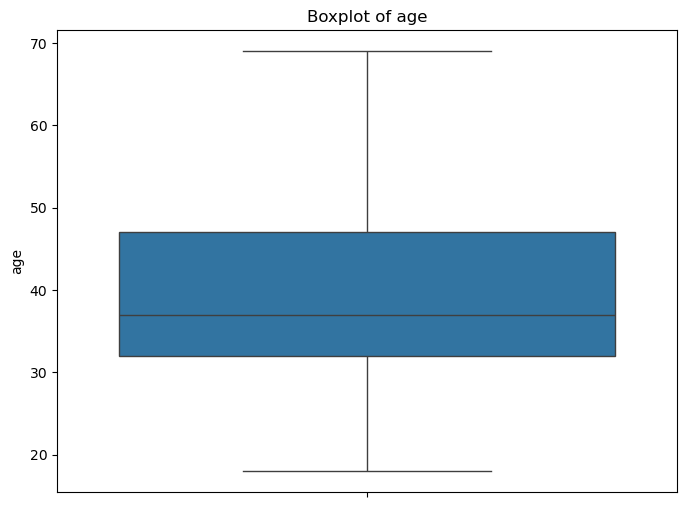

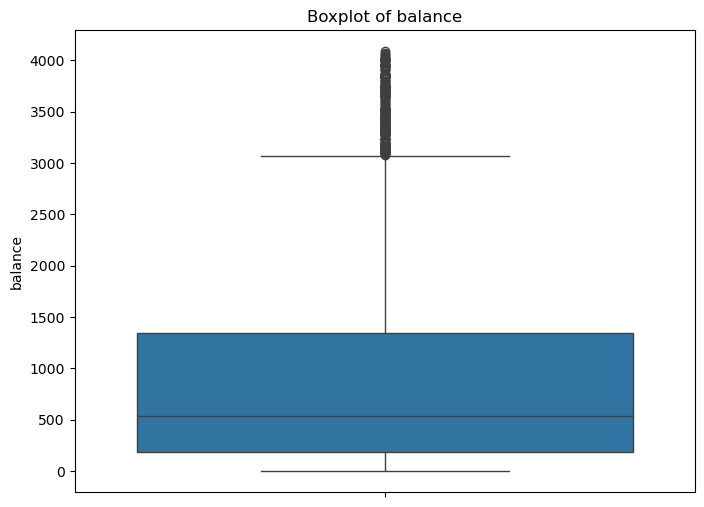

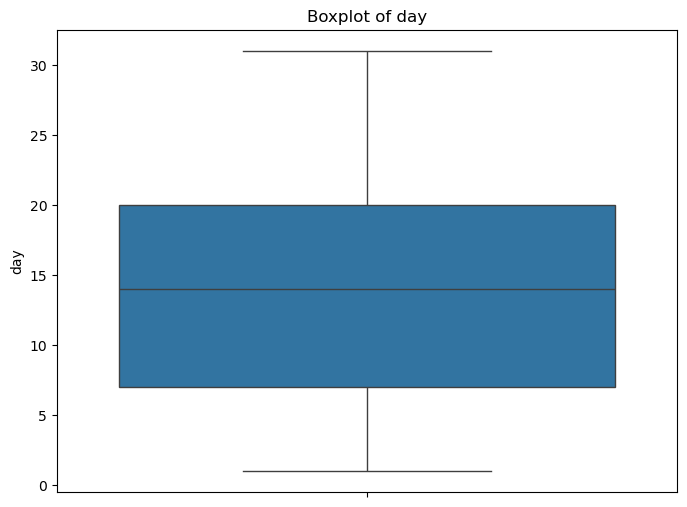

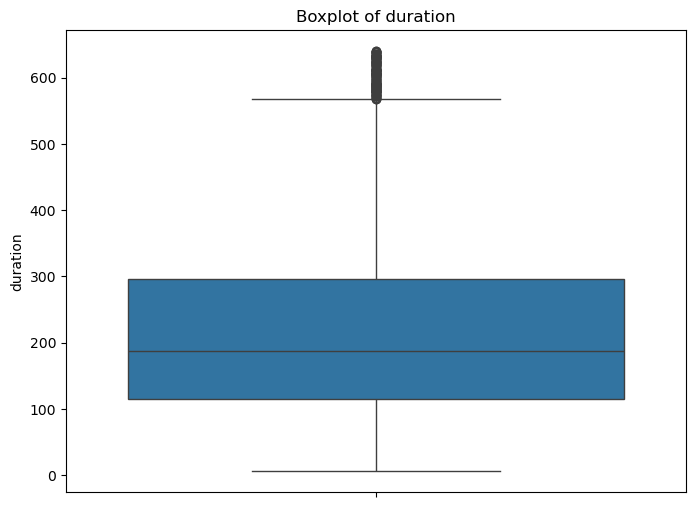

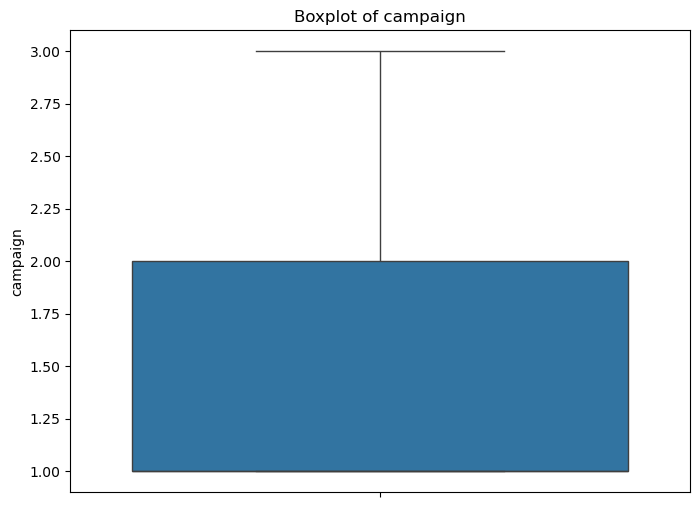

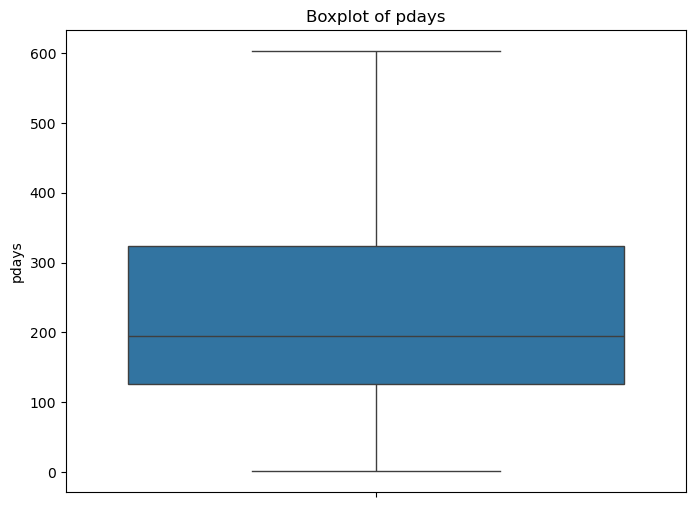

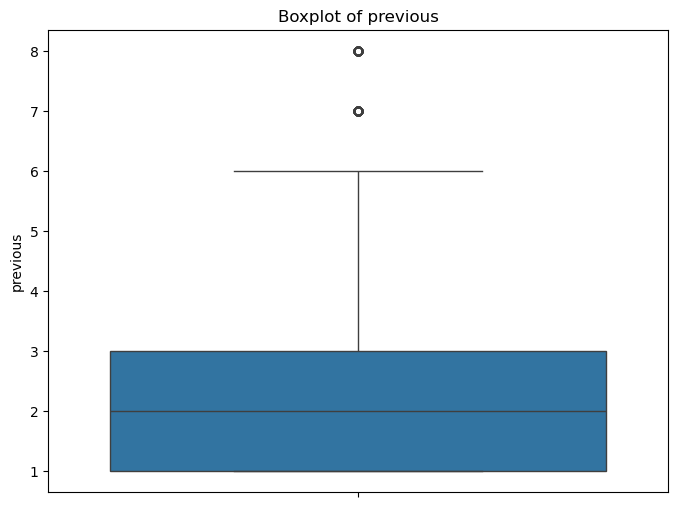

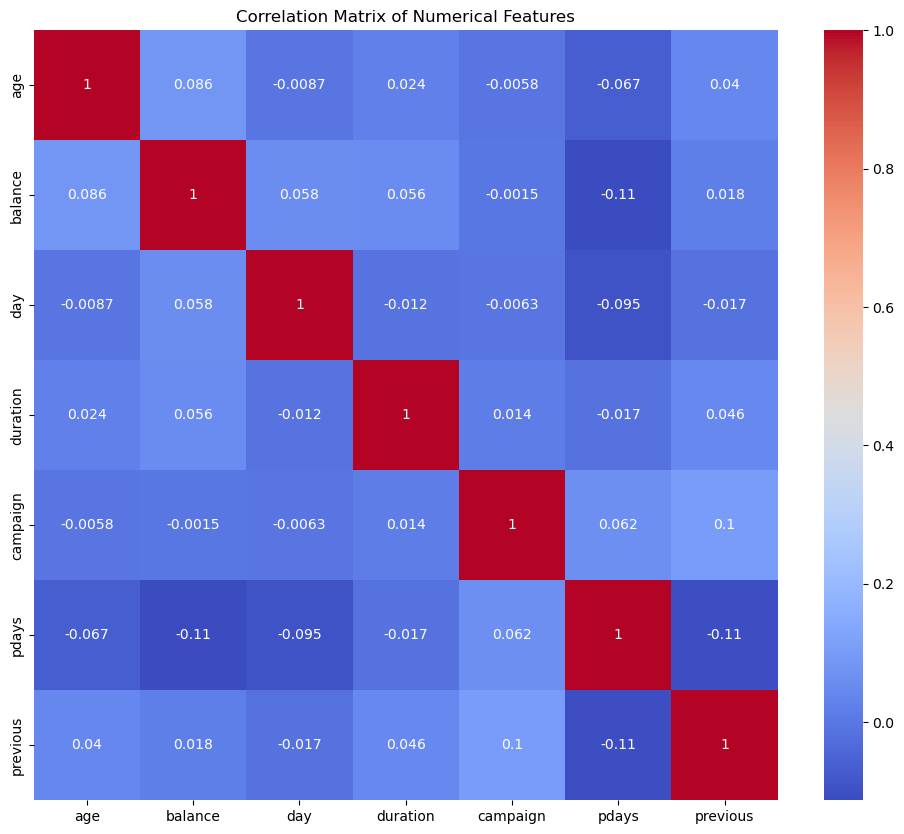

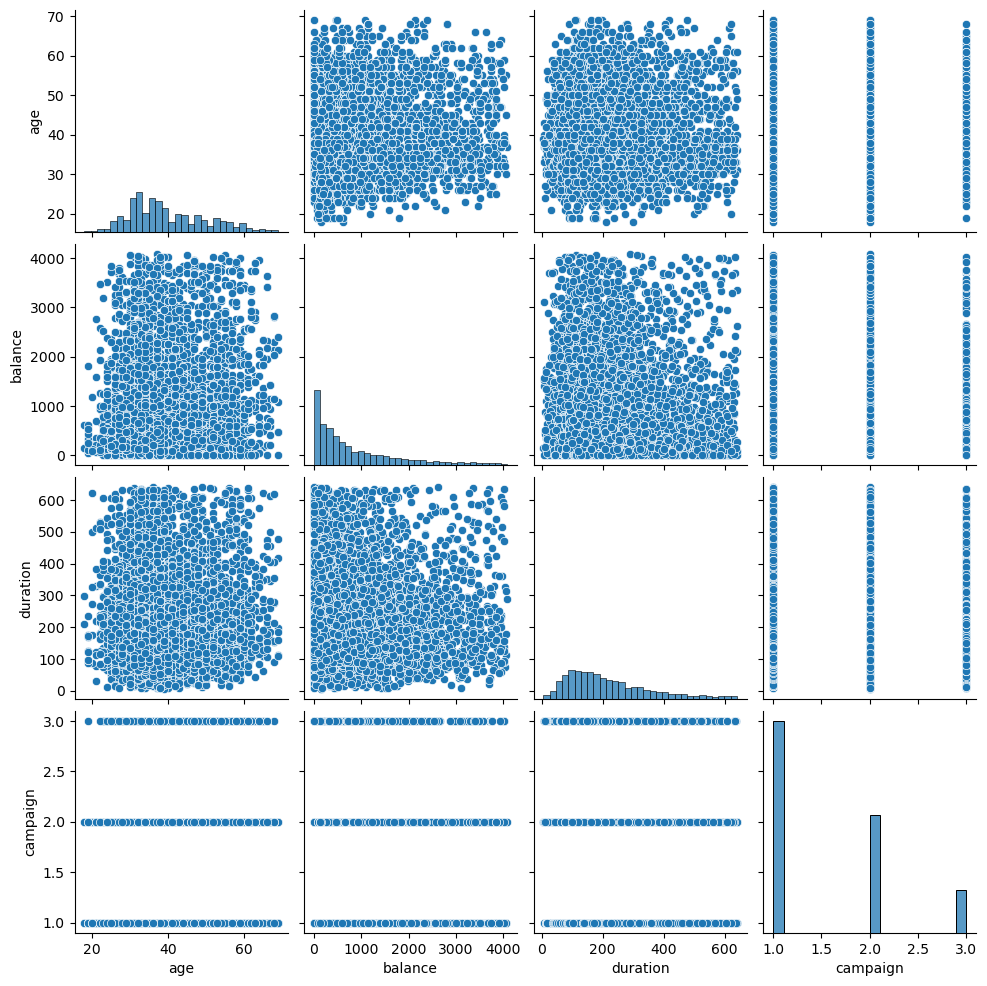

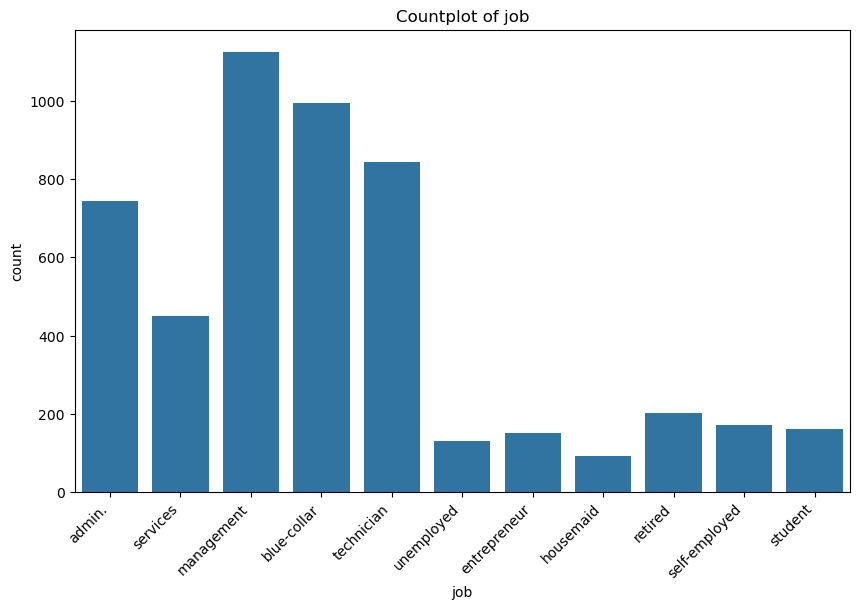

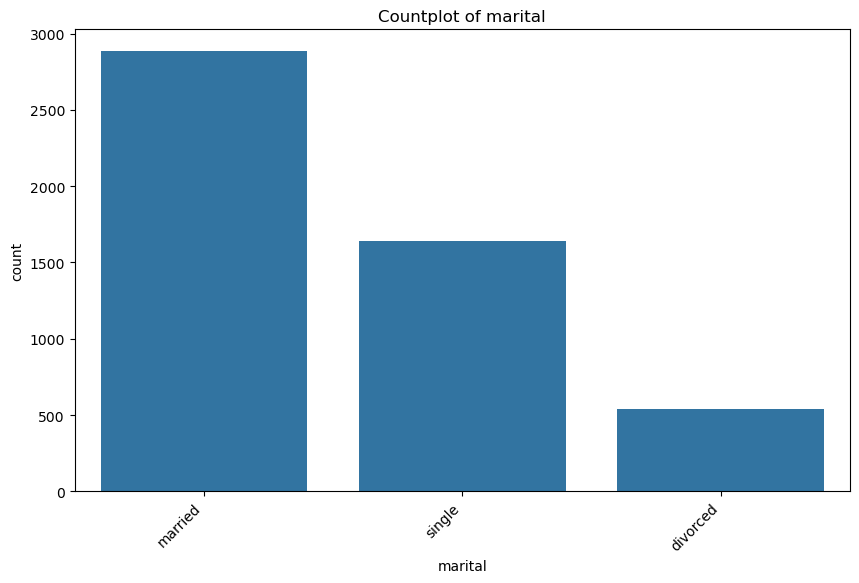

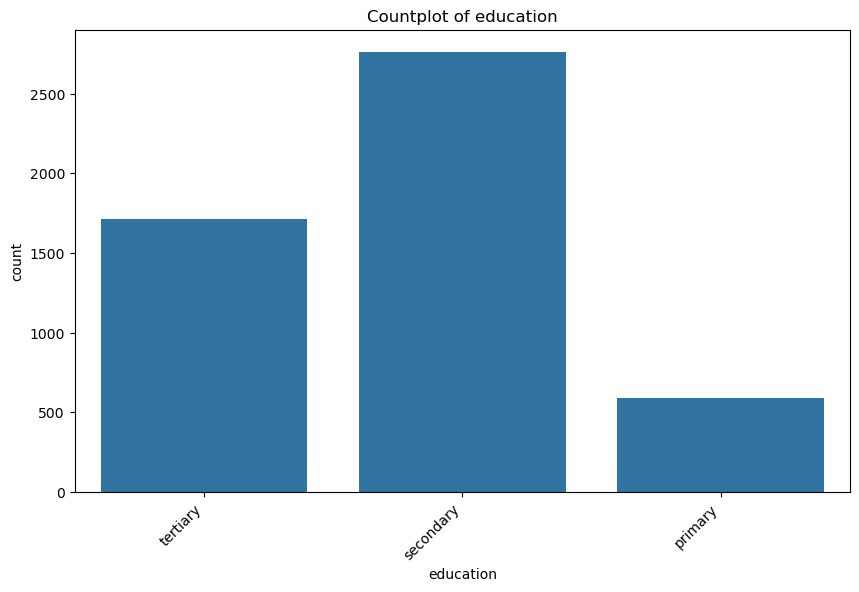

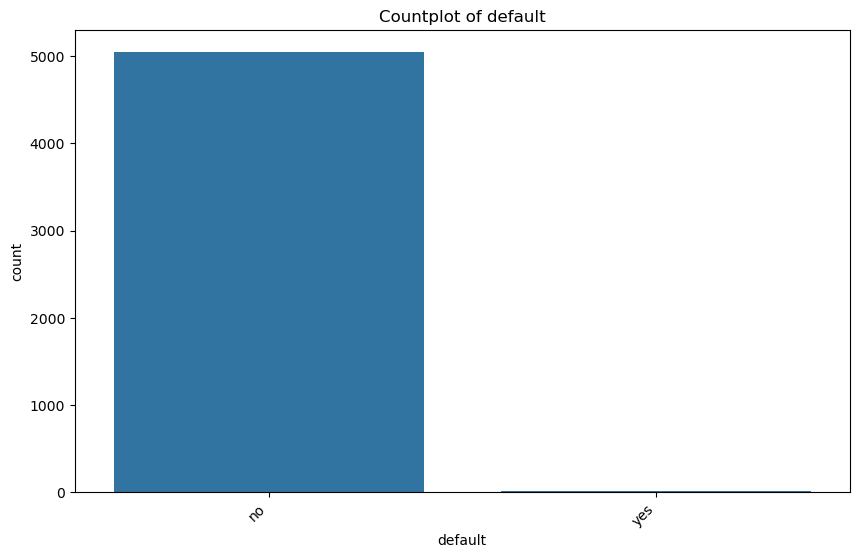

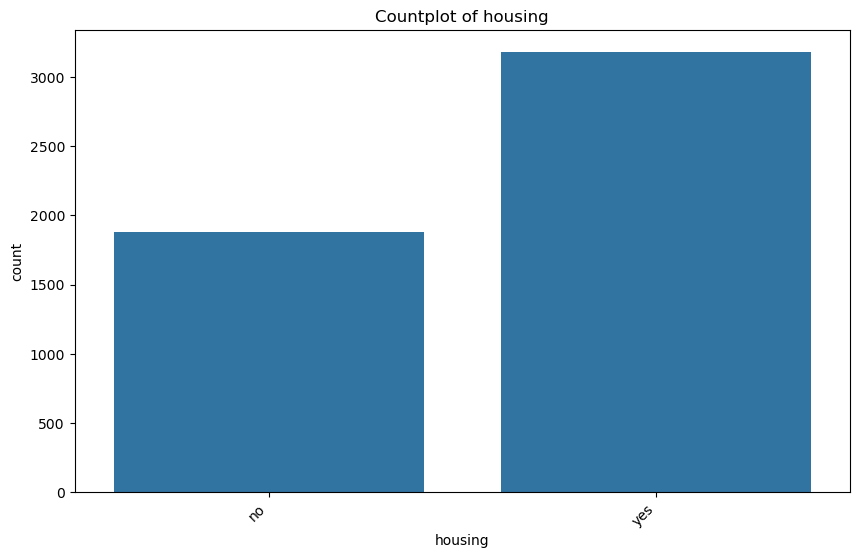

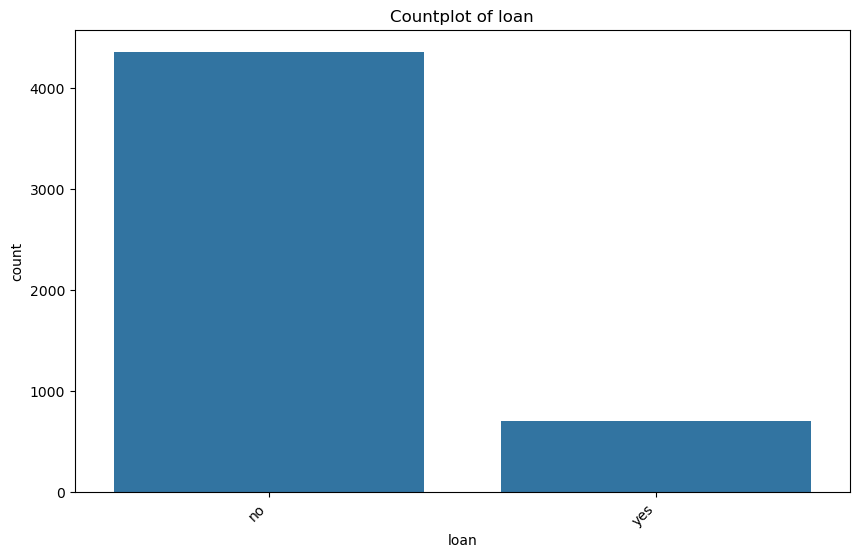

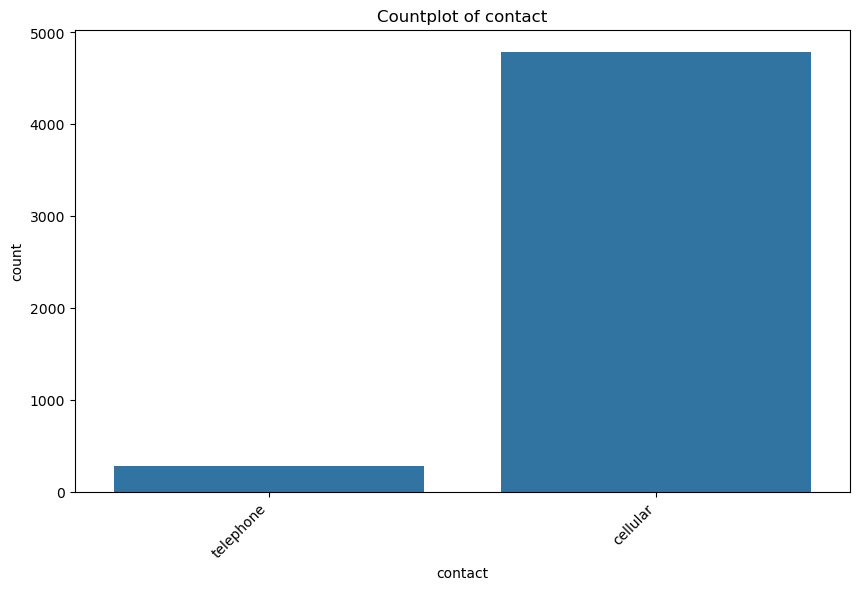

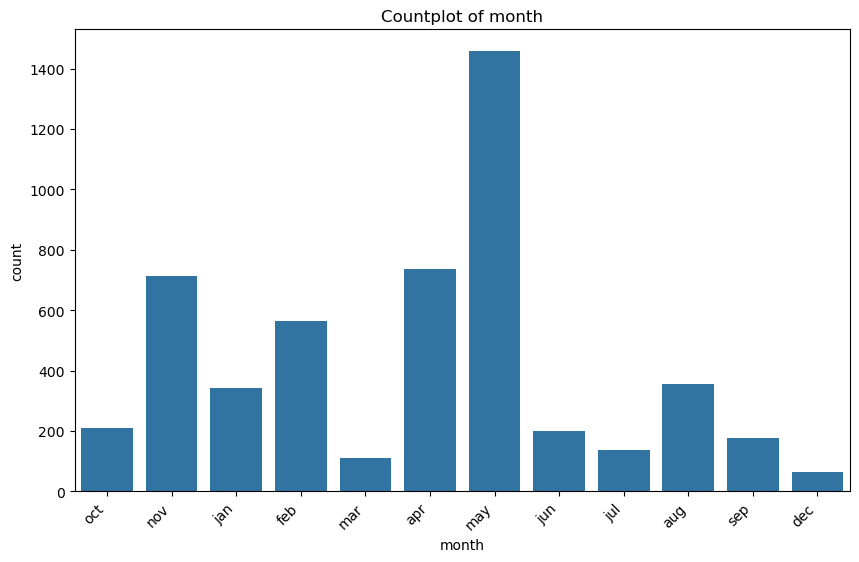

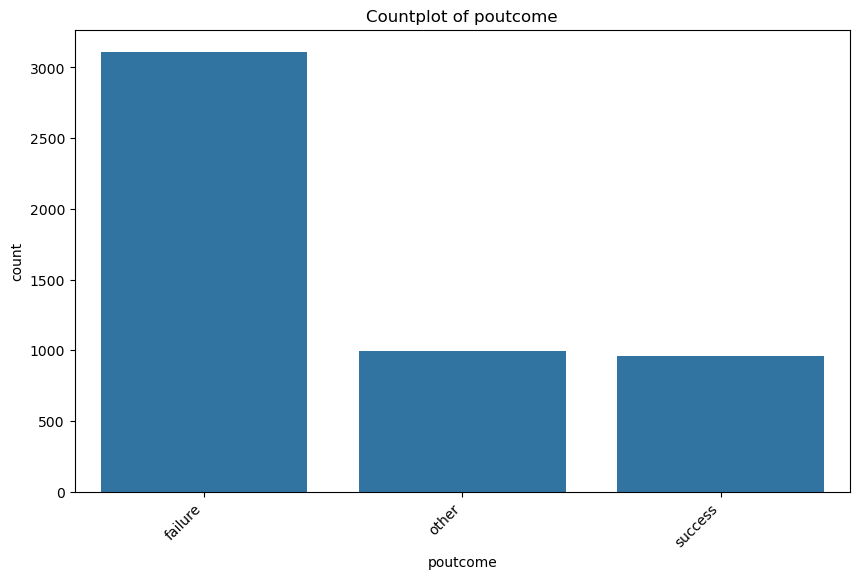

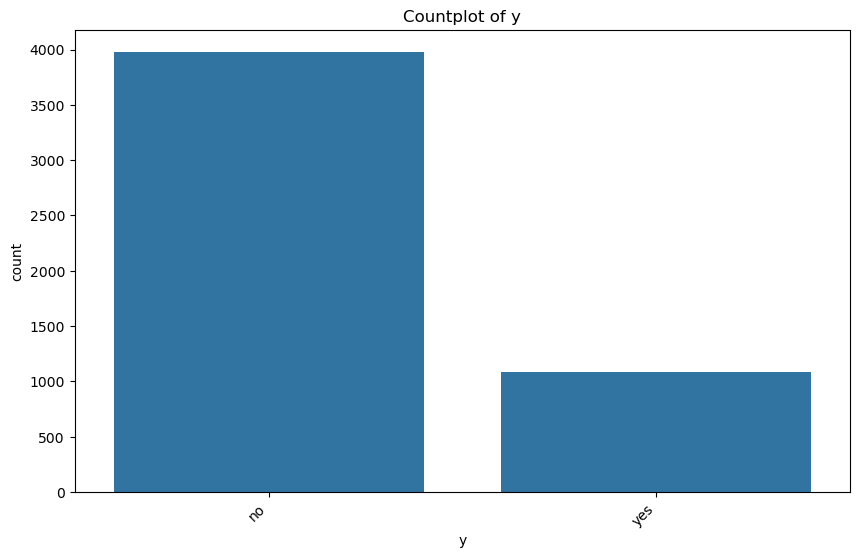

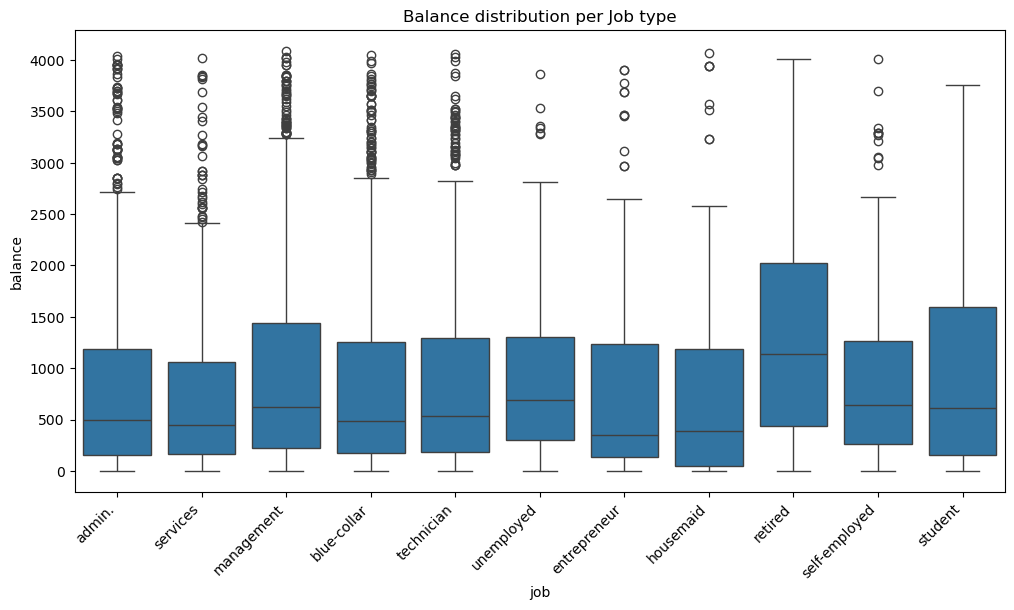

In [26]:
# prompt: generate eda all main plots


# Assuming df_no_outliers is your cleaned DataFrame

# 1. Histograms for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_no_outliers[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 2. Box plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_no_outliers[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# 3. Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_no_outliers[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 4. Pairplot for selected numerical features 
selected_numerical_cols = ['age', 'balance', 'duration', 'campaign']
sns.pairplot(df_no_outliers[selected_numerical_cols])
plt.show()


# 5. Count plots for categorical features
categorical_cols = df_no_outliers.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df_no_outliers)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.show()


# 6. Analyze relationship between categorical and numerical features (example)
# Replace 'target_variable' and 'categorical_column' with actual column names
# Example: Analysing relationship between 'job' and 'balance'
plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='balance', data=df_no_outliers) # Example visualization, adapt as needed
plt.title("Balance distribution per Job type")
plt.xticks(rotation=45, ha='right')
plt.show()

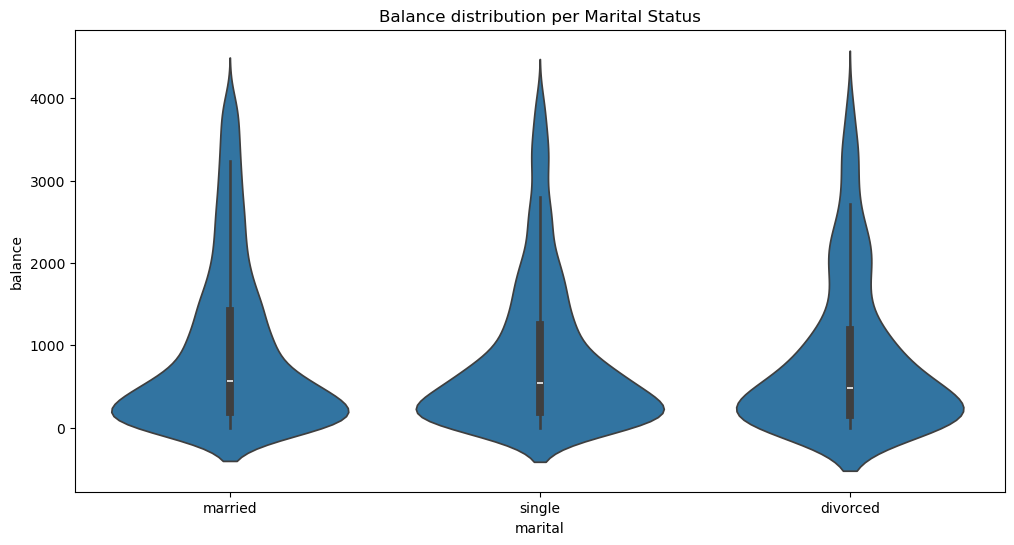

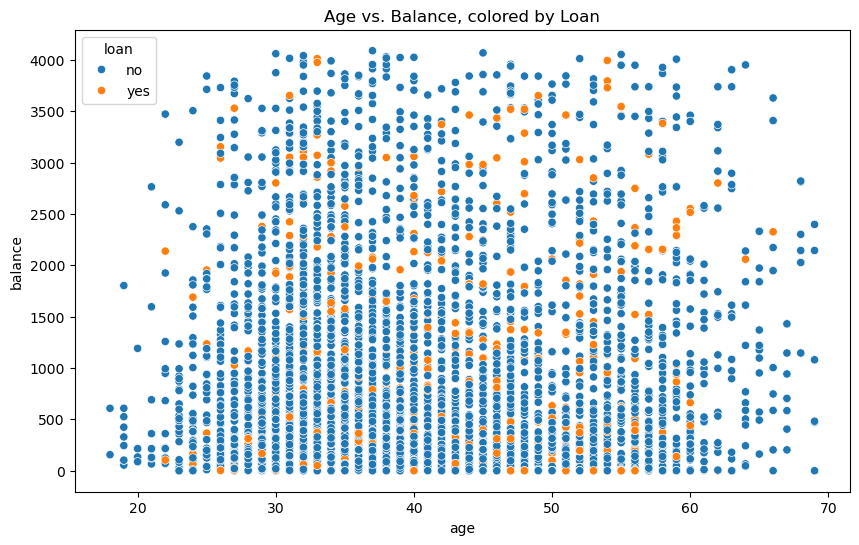

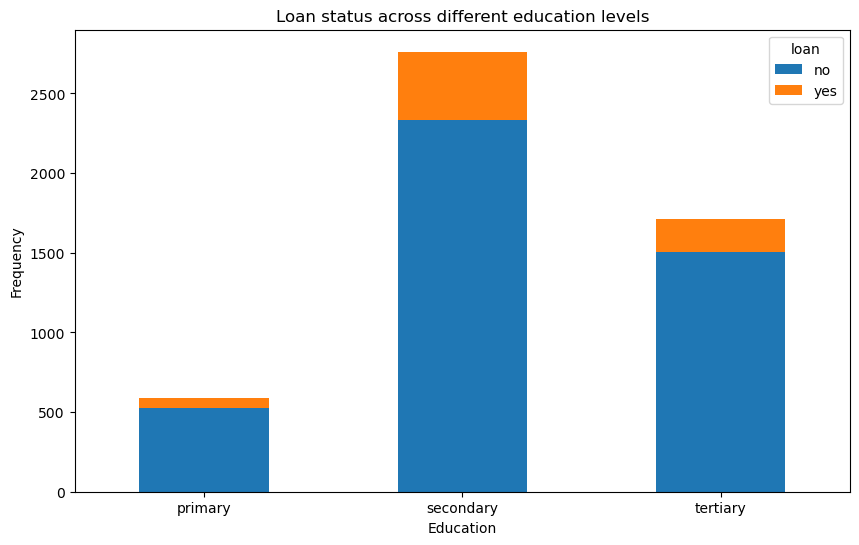

In [27]:
# prompt: few more visualization for deep understaning about data

# 7.  Violin plots for more detailed distribution comparisons (example)
plt.figure(figsize=(12, 6))
sns.violinplot(x='marital', y='balance', data=df_no_outliers)
plt.title("Balance distribution per Marital Status")
plt.show()

# 8.  Scatter plots to visualize relationships between numerical variables (example)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=df_no_outliers, hue='loan') # Example with hue for a third variable
plt.title('Age vs. Balance, colored by Loan')
plt.show()

# 9.  Stacked bar chart to show the proportions within categorical variables (example)
pd.crosstab(df_no_outliers['education'], df_no_outliers['loan']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Loan status across different education levels')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.show()

In [28]:
# prompt: convert all categorical columns using label encoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over all columns in the DataFrame
for col in df_no_outliers.columns:
    # Check if the column is of object type (categorical)
    if df_no_outliers[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        df_no_outliers[col] = le.fit_transform(df_no_outliers[col])

In [29]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5065 entries, 0 to 7838
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        5065 non-null   int64
 1   job        5065 non-null   int32
 2   marital    5065 non-null   int32
 3   education  5065 non-null   int32
 4   default    5065 non-null   int32
 5   balance    5065 non-null   int64
 6   housing    5065 non-null   int32
 7   loan       5065 non-null   int32
 8   contact    5065 non-null   int32
 9   day        5065 non-null   int64
 10  month      5065 non-null   int32
 11  duration   5065 non-null   int64
 12  campaign   5065 non-null   int64
 13  pdays      5065 non-null   int64
 14  previous   5065 non-null   int64
 15  poutcome   5065 non-null   int32
 16  y          5065 non-null   int32
dtypes: int32(10), int64(7)
memory usage: 514.4 KB


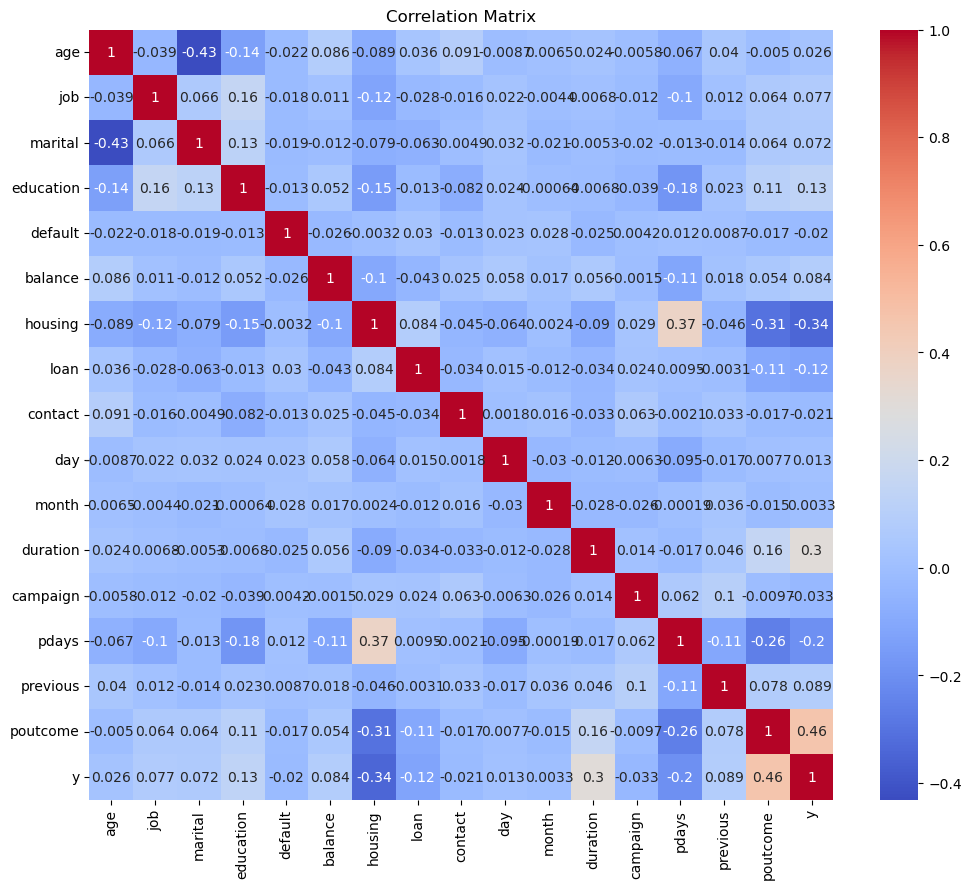

In [30]:
# 3. Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_no_outliers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
1,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
2,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
3,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
4,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [32]:
df_no_outliers.shape

(5065, 17)

In [33]:
# prompt: standardize the data and apply machine learning algorithms,target column is y(classification models)

# Assuming 'y' is your target column
X = df_no_outliers[['education', 'job', 'balance', 'housing', 'loan', 'duration', 'previous', 'poutcome']]
y = df_no_outliers['y']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred)*100)
print(classification_report(y_test, logreg_pred))


# Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred)*100)
print(classification_report(y_test, rf_pred))

Logistic Regression Accuracy: 83.41559723593286
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       797
           1       0.64      0.50      0.56       216

    accuracy                           0.83      1013
   macro avg       0.76      0.71      0.73      1013
weighted avg       0.82      0.83      0.83      1013

Random Forest Accuracy: 84.60019743336625
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       797
           1       0.69      0.50      0.58       216

    accuracy                           0.85      1013
   macro avg       0.78      0.72      0.74      1013
weighted avg       0.84      0.85      0.84      1013



In [34]:
X_scaled

array([[ 1.2225092 , -1.28986273, -0.02649587, ..., -1.31788656,
         0.31802906, -0.72855404],
       [-0.34747282,  0.84306405,  2.63901615, ..., -0.55667557,
         0.90980612, -0.72855404],
       [ 1.2225092 , -0.07104743,  1.56844165, ..., -1.07139919,
         0.90980612,  0.53909495],
       ...,
       [ 1.2225092 , -0.07104743, -0.80055556, ..., -0.42618225,
         1.50158318, -0.72855404],
       [-0.34747282,  0.2336564 ,  0.24817048, ..., -0.06370083,
         2.09336024,  1.80674394],
       [ 1.2225092 , -0.07104743, -0.33757631, ...,  0.03779397,
         0.90980612,  1.80674394]])

In [35]:
# prompt: apply svm,knn,decison trees as well

# Initialize and train an SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred)*100)
print(classification_report(y_test, svm_pred))

# Initialize and train a KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred)*100)
print(classification_report(y_test, knn_pred))

# Initialize and train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred)*100)
print(classification_report(y_test, dt_pred))

SVM Accuracy: 84.89634748272458
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       797
           1       0.72      0.48      0.58       216

    accuracy                           0.85      1013
   macro avg       0.79      0.72      0.74      1013
weighted avg       0.84      0.85      0.84      1013

KNN Accuracy: 84.99506416584403
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       797
           1       0.70      0.52      0.60       216

    accuracy                           0.85      1013
   macro avg       0.79      0.73      0.75      1013
weighted avg       0.84      0.85      0.84      1013

Decision Tree Accuracy: 79.2694965449161
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       797
           1       0.51      0.54      0.53       216

    accuracy                           0.79      1013
   macro avg       0.69

In [36]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred)*100)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred)*100)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred)*100)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred)*100)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred)*100)

Logistic Regression Accuracy: 83.41559723593286
Random Forest Accuracy: 84.60019743336625
SVM Accuracy: 84.89634748272458
KNN Accuracy: 84.99506416584403
Decision Tree Accuracy: 79.2694965449161


In [ ]:
from tkinter import *
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from PIL import ImageTk, Image
import pickle
import numpy as np

# Load the saved model
filename = 'best_model.pkl'
try:
    with open(filename, 'rb') as file:
        best_model = pickle.load(file)  # Load the trained model instance
except FileNotFoundError:
    print("Model file not found. Ensure 'best_model.pkl' is in the correct directory.")
    exit()

# Mappings for categorical variables
job_mapping = {
    "admin.": 0, "services": 7, "management": 4, "blue-collar": 1,
    "technician": 9, "unemployed": 10, "entrepreneur": 2, "housemaid": 3,
    "retired": 5, "self-employed": 6, "student": 8
}

education_mapping = {"tertiary": 2, "secondary": 1, "primary": 0}
poutcome_mapping = {"failure": 0, "other": 1, "success": 2}

# Function to validate integer input within a specific range
def validate_input(value, field_name, min_value, max_value):
    try:
        # Check if the input is a valid integer
        if not value.isdigit():
            raise ValueError("Invalid input")
        
        int_value = int(value)  # Convert to integer
        if int_value < min_value or int_value > max_value:
            raise ValueError("Out of range")
        
        return int_value
    
    except ValueError as e:
        if str(e) == "Invalid input":
            error_message = f"Invalid input value for {field_name}. Enter only integers."
        else:
            error_message = f"{field_name} must be an integer between {min_value} and {max_value}."
        
        messagebox.showerror("Input Error", error_message)
        return None

# Function to make predictions
def make_prediction():
    # Retrieve input values
    job = job_entry.get()
    education = education_entry.get()
    balance = balance_entry.get()
    housing = housing_entry.get()
    loan = loan_entry.get()
    duration = duration_entry.get()
    previous = previous_entry.get()
    poutcome = poutcome_entry.get()

    # Validation checks for empty inputs
    if not job or not education or not balance or not housing or not loan or not duration or not previous or not poutcome:
        messagebox.showerror("Input Error", "Please fill in all fields before predicting.")
        return
        
    # Validate integer inputs
    balance = validate_input(balance, "Balance", 0, 4089)
    duration = validate_input(duration, "Duration", 5, 640)
    previous = validate_input(previous, "Previous", 1, 8)

    if None in [balance, duration, previous]:
        return  # Stop if validation fails

    # Preprocess the input data
    job_encoded = job_mapping.get(job, -1)
    education_encoded = education_mapping.get(education, -1)
    housing_encoded = 1 if housing == "Yes" else 0
    loan_encoded = 1 if loan == "Yes" else 0
    poutcome_encoded = poutcome_mapping.get(poutcome, -1)

    # Check for invalid encodings
    if -1 in [job_encoded, education_encoded, poutcome_encoded]:
        messagebox.showerror("Input Error", "Invalid input values. Please check your selections.")
        return

    # Prepare input data
    input_data = np.array([[job_encoded, education_encoded, balance, housing_encoded,
                            loan_encoded, duration, previous, poutcome_encoded]])

    # Make prediction
    prediction = best_model.predict(input_data)
    y_entry.delete(0, tk.END)  # Clear previous result
    y_entry.insert(0, "Yes" if prediction[0] == 1 else "No")

# Function to clear inputs
def clear_inputs():
    job_entry.set('')
    education_entry.set('')
    balance_entry.delete(0, tk.END)
    housing_entry.set('')
    loan_entry.set('')
    duration_entry.delete(0, tk.END)
    previous_entry.delete(0, tk.END)
    poutcome_entry.set('')
    y_entry.delete(0, tk.END)  # Clear prediction output

# GUI setup
root = tk.Tk()
root.title('Term-Deposit Subscriptions Prediction')
root.geometry("800x600")
root.configure(bg="lightgray")


# Load background image
image_path = r"C:\Users\surya\OneDrive\Desktop\jupyer practise\banking 5.jpg"  # Correct path
try:
    background_image = Image.open(image_path)
    background_photo = ImageTk.PhotoImage(background_image)
    # Keep a reference to the image to prevent garbage collection
    root.background_photo = background_photo
    background_label = tk.Label(root, image=background_photo)
    background_label.place(x=0, y=0, relwidth=1, relheight=1)
except FileNotFoundError:
    print("Background image not found. Check the path and file name.")
    root.configure(bg="lightgray")

# Center alignment
root.grid_rowconfigure(0, weight=1)
root.grid_rowconfigure(20, weight=1)
root.grid_columnconfigure(0, weight=1)
root.grid_columnconfigure(2, weight=1)

# Title
title_label = tk.Label(root, text="Term-Deposit Subscriptions Prediction", font=("Palatino", 30, "bold"), bg='lightgray')
title_label.pack(pady=(20, 10))

# Input widgets
frame = tk.Frame(root, bg='lightgray')
frame.pack(pady=20)

labels = ["Job", "Education", "Balance[0-4089]", "Housing", "Loan", "Duration[5-640]", "Previous[1-8]", "Poutcome"]
entries = []

# Create inputs
job_entry = ttk.Combobox(frame, values=list(job_mapping.keys()), state="readonly", font=("Helvetica", 16))
education_entry = ttk.Combobox(frame, values=list(education_mapping.keys()), state="readonly", font=("Helvetica", 16))
balance_entry = tk.Entry(frame, font=("Helvetica", 16))
housing_entry = ttk.Combobox(frame, values=["Yes", "No"], state="readonly", font=("Helvetica", 16))
loan_entry = ttk.Combobox(frame, values=["Yes", "No"], state="readonly", font=("Helvetica", 16))
duration_entry = tk.Entry(frame, font=("Helvetica", 16))
previous_entry = tk.Entry(frame, font=("Helvetica", 16))
poutcome_entry = ttk.Combobox(frame, values=list(poutcome_mapping.keys()), state="readonly", font=("Helvetica", 16))

entry_widgets = [job_entry, education_entry, balance_entry, housing_entry, loan_entry, duration_entry, previous_entry, poutcome_entry]

for i, label_text in enumerate(labels):
    # Create labels
    label = tk.Label(frame, text=label_text, font=("Helvetica", 16), bg='lightgray')
    label.grid(row=i, column=0, padx=10, pady=5, sticky="w")
    # Place entries
    entry_widgets[i].grid(row=i, column=1, padx=10, pady=5)

# Predict Button
predict_button = tk.Button(root, text="Predict", font=("Helvetica", 16, "bold"), bg='black', fg='white', command=make_prediction)
predict_button.pack(pady=10)

# Output for prediction
y_label = tk.Label(root, text="Prediction Result:", font=("Helvetica", 16), bg='lightgray')
y_label.pack()

y_entry = tk.Entry(root, font=("Helvetica", 16), bg='lightyellow')
y_entry.pack(pady=5)

# Clear Button
clear_button = tk.Button(root, text="Clear", font=("Helvetica", 16, "bold"), bg='gray', fg='black', command=clear_inputs)
clear_button.pack(pady=10)

# Run the GUI
root.mainloop()